# CSV to geodf

In [94]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [95]:
# Display all column when looking at dfs
pd.set_option("display.max.columns", None)

In [96]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Lets use the longitude and latitude columns in the CSV, to create a geodataframe. T
hese indicate the location of the power plants in the NAD83 CRS (EPSG:4269). 
We can use this information to create a new geopandas.GeoDataFrame from the pandas.DataFrame using the `geopandas` function `points_from_xy()`:

In [4]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [5]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [6]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


In [7]:
print('is the CRS geographic?: ', power_plants.crs.is_geographic)

is the CRS geographic?:  True


<Axes: >

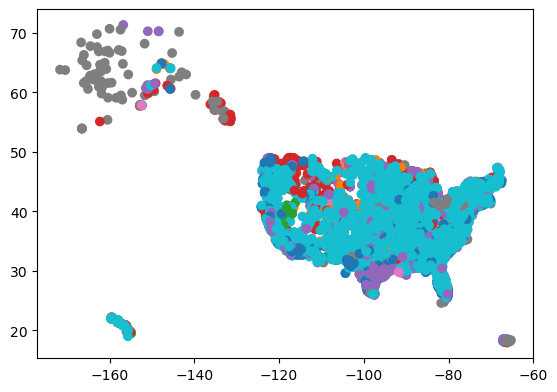

In [8]:
# Plot points and color them according to values in primsource column
power_plants.plot(column='primsource')  

## f-strings

So far, we have printed variables using string concatenation inside the `print()` function: we use commas to separate every variable and string that we want to print. Example:

In [9]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way to mix variables and strings in a print statement is by creating a **f-string**, stands for "formatted string".

The simplest syntax:
```python
f"some text {replace}"
```
where `replace` can be a variable, na expression, a function or method call.
Example:

In [10]:
# Check what is the ellipoid
print(f"ellipsoid: {power_plants.crs.datum}")

ellipsoid: North American Datum 1983


Advanatages of f-strings: a lot of customization for formatting output.

In [11]:
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


## Import shapefile

In [12]:
os.getcwd()

'/Users/jcardelle/MEDS/eds-220/eds220-2024-in-class'

In [13]:
# Create absolute file path to data
fp = os.path.join('/', 
                  'courses', 
                  'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

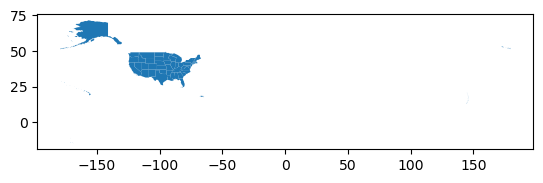

In [14]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers iinstead of strings, let's update the corresponding columns in the geo-dataframe

In [15]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This inconvenient because it repeats the same ppiece of code, only changing the column name.
Instead, using a `for` loop allows to succinctly print the same info:

In [16]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names 

**DRY code**

DRY = dont repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic.
If you need to repeat the "same" code more than twice, you probably need a `for` loop.

Next, update data type of the codde columns to be integers.
This time, we verify the data type of the column using the `is_numeric_dtype()` and `assert` statement:

In [17]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversion

The `assert` keyword does nothing if the expression next to it evaluaates to `True`.
If the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code from running.
Example:

In [18]:
# Does nothing if statement is True
assert 2 + 2 == 4

In [19]:
# Raises an error if statement is False
# assert 2 + 2 == 3 

## Data selection

For this lesson, we want to use only the contiguous states.

<Axes: >

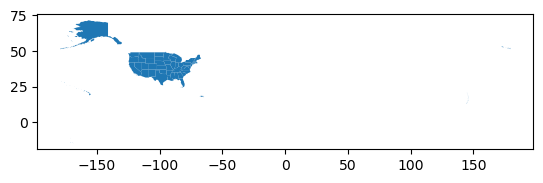

In [20]:
states.plot()

## Check-in

- What are the unique values for region, division, or state codes in the data?
- Which codes should we select to keep only states in the contiguous US?

In [21]:
states.region.unique()

array([3, 2, 1, 4, 9])

In [22]:
states.division.unique()

array([5, 3, 4, 1, 8, 9, 2, 7, 6, 0])

In [23]:
states.statefp.unique()

array([54, 12, 17, 27, 24, 44, 16, 33, 37, 50,  9, 10, 35,  6, 34, 55, 41,
       31, 42, 53, 22, 13,  1, 49, 39, 48,  8, 45, 40, 47, 56, 15, 38, 21,
       78, 69, 66, 23, 36, 32,  2, 60, 26,  5, 28, 29, 30, 20, 18, 72, 46,
       25, 51, 11, 19,  4])

Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded.

In [24]:

# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]

<Axes: >

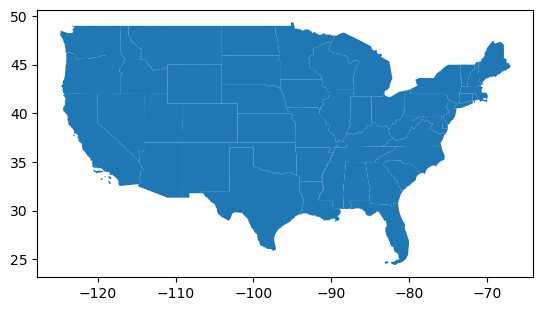

In [25]:
contiguous.plot()

In [26]:
contiguous.crs == power_plants.crs

True

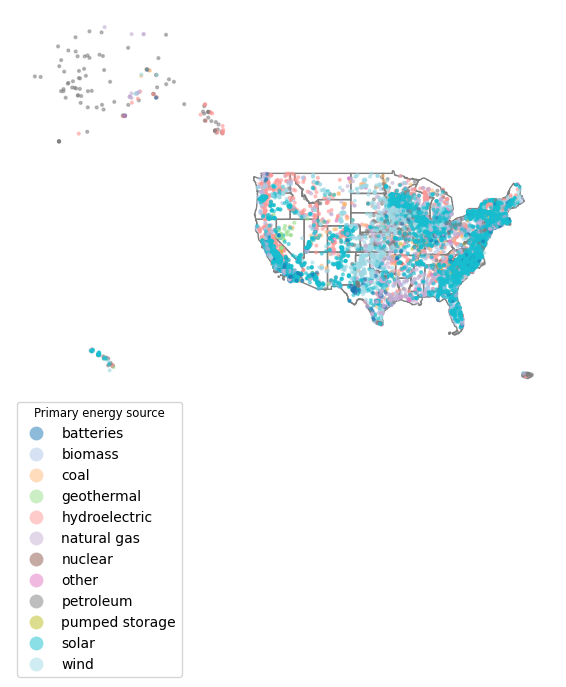

In [27]:
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

contiguous.plot(ax=ax,
               color='none',
               edgecolor='gray')

# Add electric power plants colored by energy source

power_plants.plot(ax=ax,
                 column='primsource',
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize':'small',
                      'loc':'upper left',
                      'bbox_to_anchor':(0,0)
                  }
                 )
plt.show()

## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so taht you can iterate over their elements in pairs.

When used in a `for` loop it allows you to process elemetns of each list together.

Example:


In [29]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

1
2
3


In [30]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`.
A common situation when code gets repeated is when creating subplots.

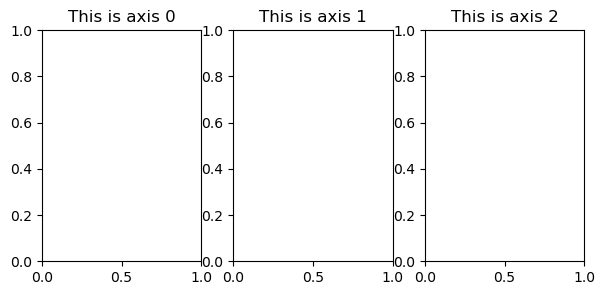

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In [33]:
axes

array([<Axes: title={'center': 'This is axis 0'}>,
       <Axes: title={'center': 'This is axis 1'}>,
       <Axes: title={'center': 'This is axis 2'}>], dtype=object)

## Check-in

Use `for` and `zip` to create the same subplots and avoid redundancy:

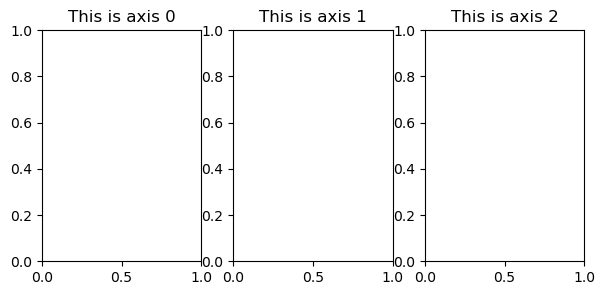

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))


for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")

In [45]:
power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [46]:
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## Exercise

1. Select the power plants in California in a variable names `ca_power_plants`.
2. Create a list named top_sources with California’s top 3 electric primary sources.
3. Isolate the California state boundary in a variable named ca_boundary.
4. Recreate the plot in notes

In [65]:
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,19.0,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,38.0,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,54.0,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)


In [67]:
# top_sources with California’s top 3 electric primary sources
top_sources = ca_power_plants.groupby('primsource').agg(count=('primsource', 'count')).reset_index().sort_values('count', ascending=False).head(3)
top_sources = top_sources['primsource'].tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

In [74]:
# Another method:
top_sources = ca_power_plants.primsource.value_counts().index[:3].to_list()
top_sources

['solar', 'natural gas', 'hydroelectric']

(-124.99954260000001, -113.61367139999999, 32.05479845, 42.483536550000004)

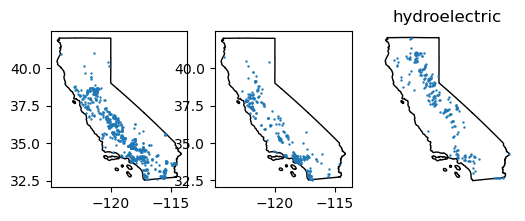

In [73]:
ca_boundary = states[states.name=='California']

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))

for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax=ax, color='none')
    
    #Select points for the sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax=ax,
               markersize=0.5)
ax.set_title(source)
ax.axis('off')

## Functions

**functions** in Python are blocks of reusable code designed to perform specific tasks, and make your code more modular and organzied.

The general syntax:

```python
def function_name(paramenter_1,..., parameter_n ):
    """Docstring"""
    <body of the function>
    return value # Depends on the function
```

Examples:
A simple function with a one-line docstring and no return values.

In [75]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

In [76]:
greet()

Hello, welcome to the class!


Example 2:
a function with a more detailed docstring and a return value

In [82]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle
    Returns:
        Float: The area of the circle, calculated as pi * radisu^2
    """
    area = 3.14159 * radius ** 2
    return area

In [83]:
circle_area(2)

12.56636

## Example

Going back to our power_plants data frame, let's create a function that will give us the top 3 primary energy sources for a given state.

In [109]:
def top3_sources(state):
    state_power_plants = power_plants[power_plants.state == state]
    top_sources = state_power_plants.primsource.value_counts().index[:3].to_list()
    return top_sources

In [110]:
top3_sources('New York')

['solar', 'hydroelectric', 'natural gas']

In [111]:
top3_sources('Florida')

['solar', 'natural gas', 'biomass']

In [112]:
top3_sources('Washington')

['hydroelectric', 'wind', 'natural gas']

In [113]:
top3_sources('Texas')

['natural gas', 'wind', 'solar']

## Check-in
Write a function states_with_source that takes a primary energy source (e.g., ‘solar’) and returns a list of states that use that source.